In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
dt = pd.read_csv("C:/Users/hp/Downloads/data.csv")

In [ ]:
#the dataset describes the values of 3D printing parameters and their impacts on the outputs of the printed parts.
#the first 9 columns are the input vatiable parameters while the last 3 columns represent the output effects 
#two kinds of filament materials are used in this analysis and their respective behaviors are captured
#we will identify what parameters significantly affect each of the output properties and which do not
# the outputs bineg investigated are 'Roughness', 'Elongation', and 'Tension Strength' of the printed parts

In [2]:
dt.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [ ]:
# next we check for any missing data in the dataset

In [3]:
dt.isnull().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

In [ ]:
#since there are no missing data, we proceed to converting the categorical values in 'infill_pattern' and 'material' to Numeric Values 

In [4]:

dat = dt.copy()


In [5]:
cat_columns = dat.select_dtypes(['object']).columns

 #collects all columns with categorical values together

dat[cat_columns] = dat[cat_columns].apply(lambda x: pd.factorize(x)[0])
dat.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [ ]:
# next we create a correlation matrix to give us an idea of which parameters directly relate with our output values more


In [6]:
corr_matrix = dat.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(4)

C:\Users\hp\AppData\Local\Temp\ipykernel_10720\3221316662.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(4)


,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
layer_height,1.0000,-0.1926,0.0035,-0.0000,0.0000,0.0000,-0.0555,0.0000,-0.0000,0.8013,0.3382,0.5076
wall_thickness,-0.1926,1.0000,0.1026,0.1452,-0.1185,-0.0293,-0.4195,0.1175,-0.0293,-0.2270,0.3998,0.1764
infill_density,0.0035,0.1026,1.0000,-0.1673,0.2386,-0.0000,-0.0943,-0.2629,0.0000,0.1184,0.3585,0.1590
infill_pattern,-0.0000,0.1452,-0.1673,1.0000,-0.1704,0.0000,-0.0000,0.2000,-0.0000,-0.0683,0.0091,0.0461
nozzle_temperature,0.0000,-0.1185,0.2386,-0.1704,1.0000,0.6025,-0.0000,-0.7838,0.6025,0.3486,-0.4059,-0.5274
bed_temperature,0.0000,-0.0293,-0.0000,0.0000,0.6025,1.0000,0.0000,0.0000,1.0000,0.1921,-0.2529,-0.3009
print_speed,-0.0555,-0.4195,-0.0943,-0.0000,-0.0000,0.0000,1.0000,-0.0000,-0.0000,0.1211,-0.2646,-0.2341
material,0.0000,0.1175,-0.2629,0.2000,-0.7838,0.0000,-0.0000,1.0000,-0.0000,-0.2332,0.2897,0.3947
fan_speed,-0.0000,-0.0293,0.0000,-0.0000,0.6025,1.0000,-0.0000,-0.0000,1.0000,0.1921,-0.2529,-0.3009
roughness,0.8013,-0.2270,0.1184,-0.0683,0.3486,0.1921,0.1211,-0.2332,0.1921,1.0000,0.0516,0.0990


In [ ]:
# we can already observe the following based on the correlation map plot
# 1. Roughness correlates with the layer height. An increased layer height implies an increase in roughness feature.
# 2. Material and nozzle temperarure are negatively correlated. The implication is a decreased material quality if the nozzle temperature is increased.
# 3. Bed temperature correlates with the nozzle temperature. As nozzle temperature increases, bed temperature increases.
# 4. Fan speed is positively correlated with nozzle temperature as well.
# 5. Fan speed is full positively correlated (1) with bed temperature.
# 6. The labels elongation and tension strength are positively correlated as well.

In [ ]:

# The various units of the nine input variables are given below:
#              1. Layer Height in mm
#              2. Wall Thickness in mm
#              3. Infill Density in %
#              4. Infill Pattern in either Grid or Honeycomb
#              5. Nozzle Temperature in Degree C
#              6. Bed Temperature in degree C
#              7. Print speed in mm/s
#              8. Material in either abs or pla
#              9. Fan Speed in %

# while the units of the labels are given as
#              1. Roughness in micro metre
#              2. Tension Strength in MPa
#              3. Elongation in %

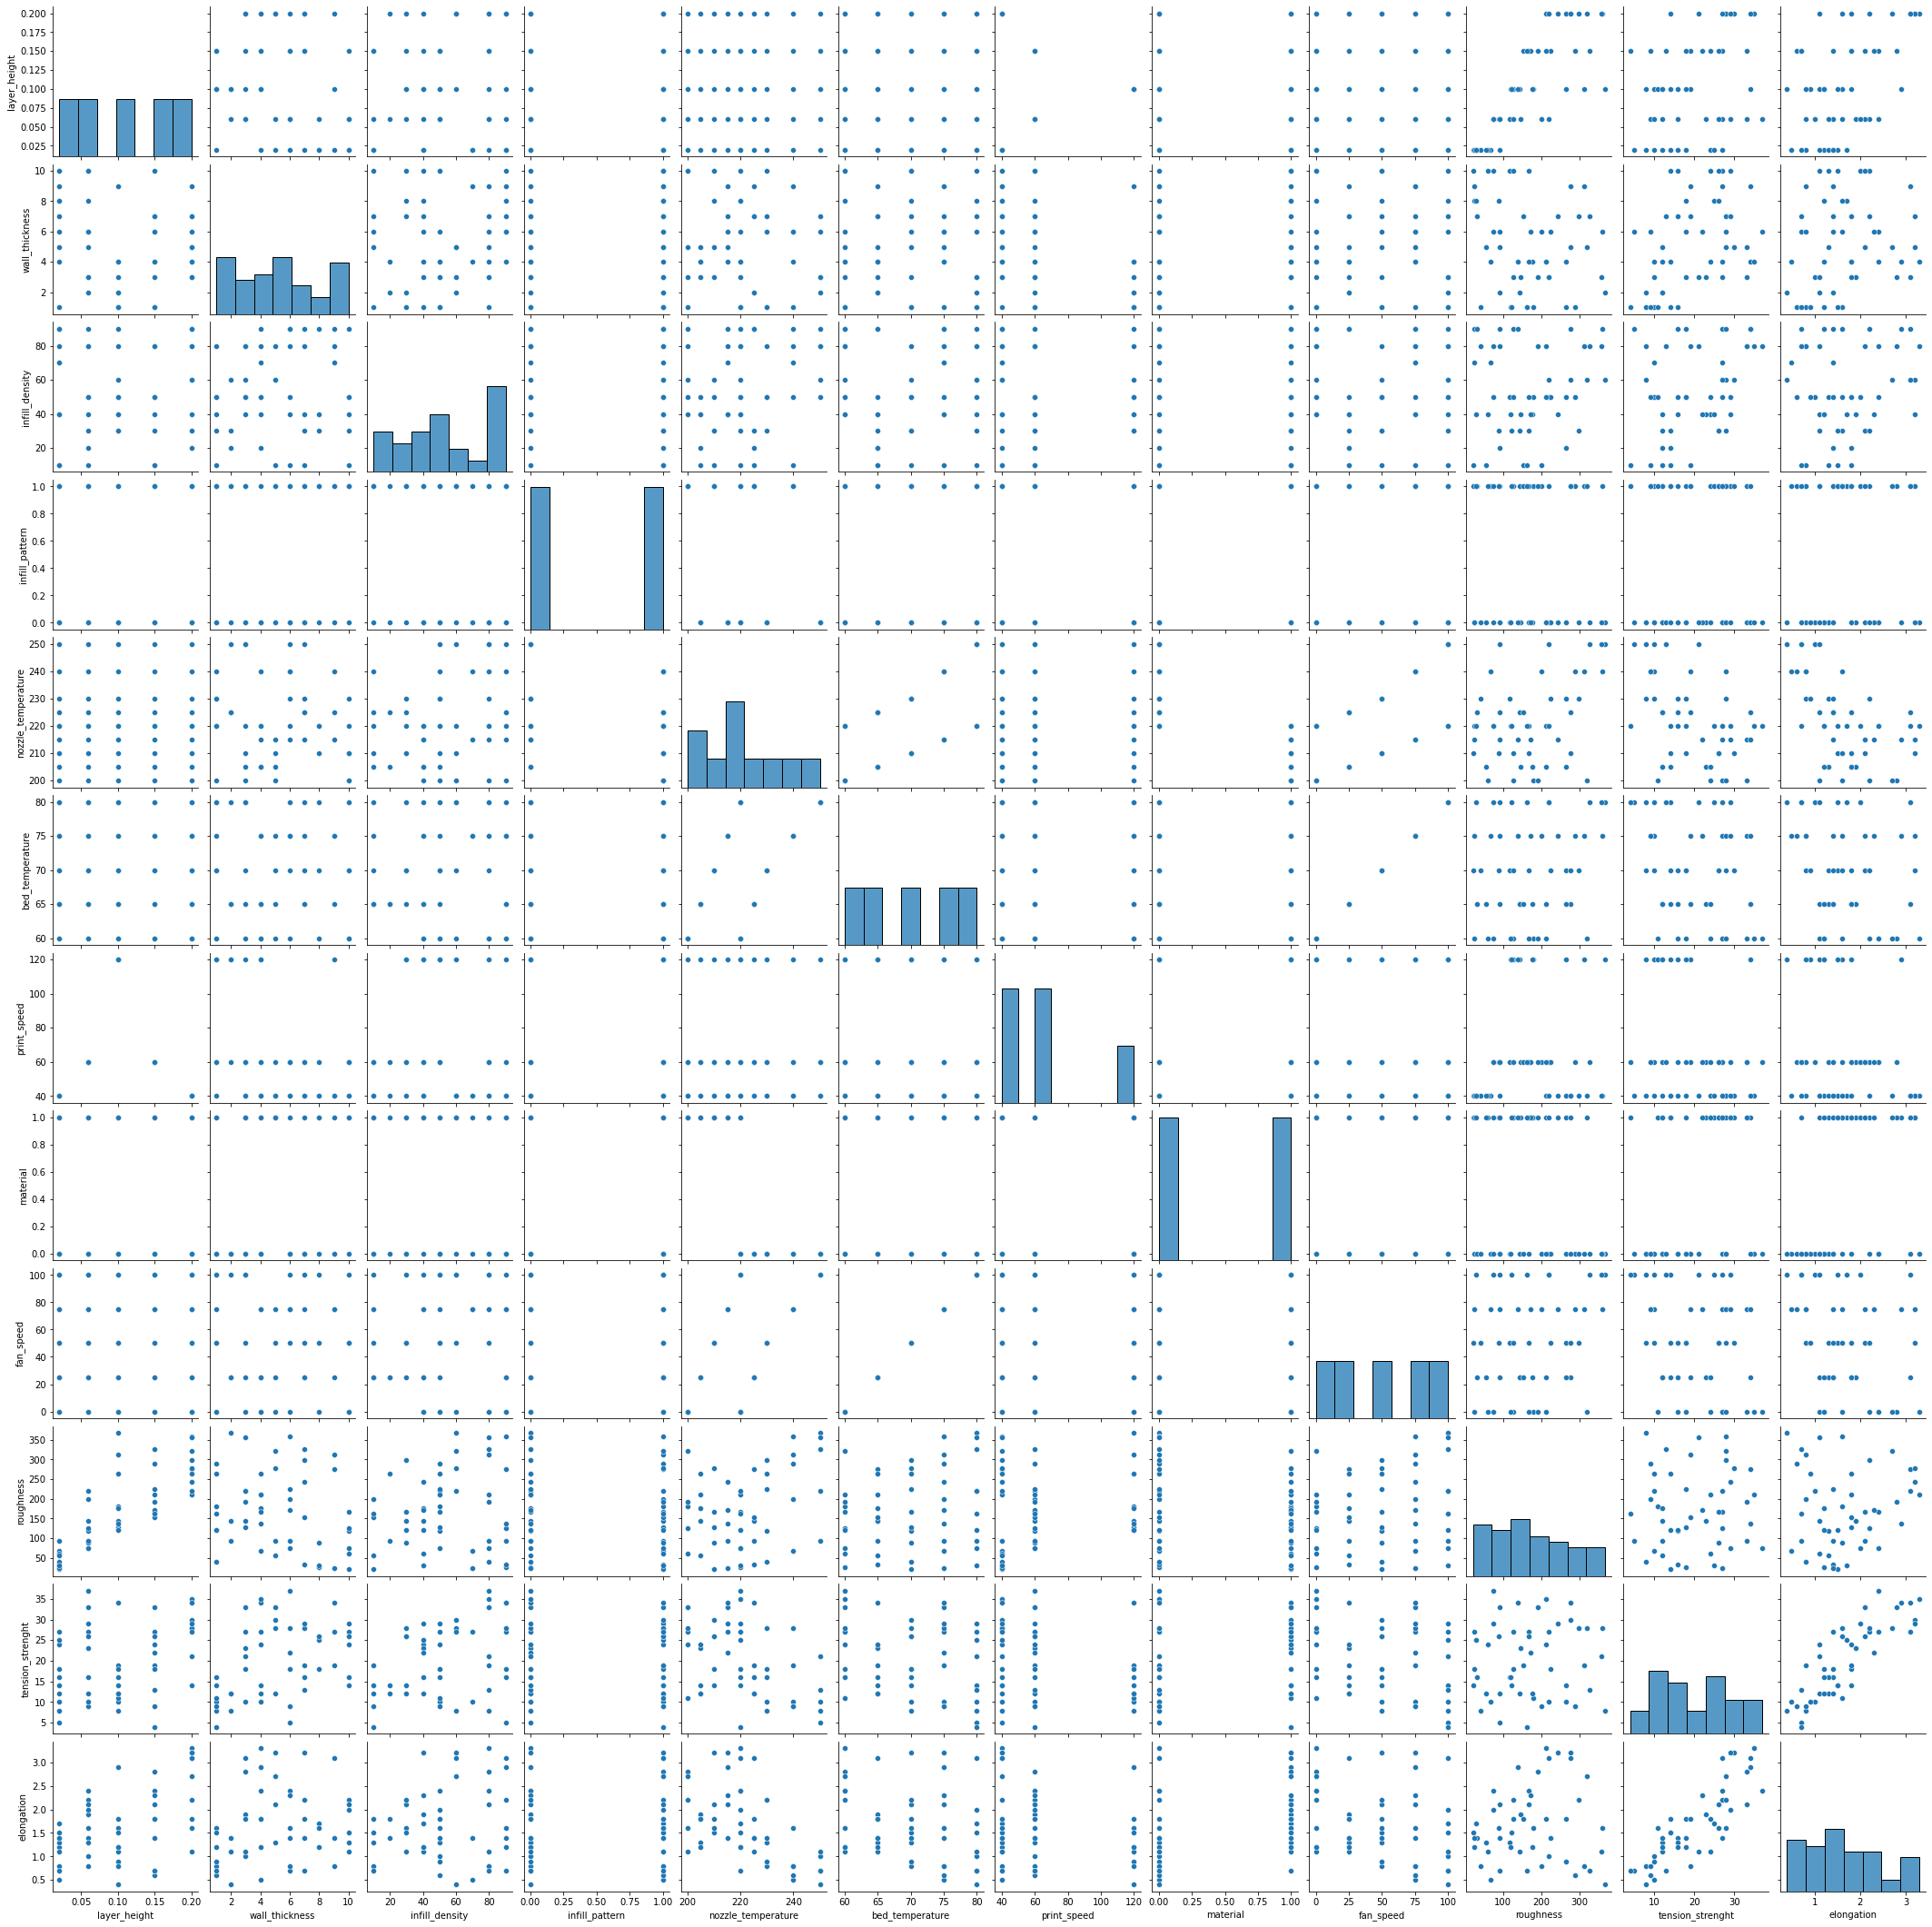

In [7]:
sns.pairplot(dat)

In [ ]:
# Ordinary Least Squares (OLS) method is widely used to estimate the parameter of a linear regression model. OLS estimators minimize the sum of the squared errors (a difference between observed values and predicted values)

In [ ]:

# The deductions from the heatmap would be used to optimize the model. The 9 variables would be implemented when building the model. statsmodels library would be used to perform the linear regression. 

# Train Test Split
# A Train-Test split of the data will be used to build the model and the test used to evaluate its accuracy.

# I have chosen to use the 50 units of data for the observation since the dataset is not much

# Model 1 : Predicting roughness based on 9 variables.
# Here we will be building a multiple linear regression model to predict roughness based on all the 9 features from layer_height to fan_speed

In [8]:
# Defining features and labels
X = dat.drop(['roughness','tension_strenght','elongation'], axis = 1)
y = dat['roughness']

In [9]:
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [17]:
# next we define a function for the multiple regression

def linear_Regression(x,y):
    
    x = sm.add_constant(x)
    
    #defining the model, fitting the model and printing the results
    multiple_reg_model = sm.OLS(y,x).fit()
    print(multiple_reg_model.summary())

In [18]:

linear_Regression(X,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     59.78
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.67e-18
Time:                        22:05:42   Log-Likelihood:                -248.88
No. Observations:                  50   AIC:                             509.8
Df Residuals:                      44   BIC:                             521.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9307      0

In [ ]:
Deductions
The R-squared value is 0.875 ot 87.5% which states that about 87.5% of proportion of variability in data can be explained by this linear regression model. The r-squared is the most important parameter for a model evaluation. The higher the value, the better is the fit.

The p-value is an important measure for evaluating the various variables. Closer is the p-value to 1, the lesser is that feature variable has to do with the label variable. In our model, wall thickness, infill_density and infill_pattern are all close to 1 meaning they don't play much role in roughness.

Finally, the expression for this model can be written from the coefficients as follows

Roughness = -0.9534 + 1269.4449*layer_height + 2.3342*wall_thickness - 0.0423*infill_density - 0.1255*infill_pattern + 15.0562*nozzle_temperature - 55.6225*bbed_temperature + 0.6496*print_speed + 298.4514*material + 7.8989*fan_speed

The coefficients suggest the following
In the absence of all the parameters, the roughness decreases by 0.9534 micro metre by the constant term. This may be due to other factors like ambient temperature which are not considered for the model.
A positive coefficient value states that an increase in wall thickness (example) by 1 mm results in increase in roughness by 2.3342 micro metre.
Similarly, a negative coefficient value states that an increase in bed temperature by a degree C causes 55.6225 micro metre decrease in roughness.

In [ ]:
# Now let's consider to eliminate wall thickness, infill density and infill pattern and build the model to see if there's any improvement.

In [19]:
X = X.drop(['wall_thickness','infill_density','infill_pattern'], axis = 1)
X.head()

KeyError: "['wall_thickness', 'infill_density', 'infill_pattern'] not found in axis"

In [13]:
#calling the linear regression function
linear_Regression(X,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     59.78
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.67e-18
Time:                        19:14:58   Log-Likelihood:                -248.88
No. Observations:                  50   AIC:                             509.8
Df Residuals:                      44   BIC:                             521.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9307      0

In [ ]:
Deductions

The R-squared value decreases to 87.2% which is not much decrease.
The p-values of all the considered features do play an important role in predicting the label.
We can improve the model further by considering interaction terms based on the correlation heatmap.
The various interaction terms are as follows
Material and nozzle temperature (-0.78)
Bed temperature and nozzle temperature (0.6)
Fan speed and nozzle temperatue (0.6)
Fan speed and bed temperature (1)

In [20]:
#get the interaction terms by multiplying values

interaction_mn = X['material']*X['nozzle_temperature']
interaction_bn = X['bed_temperature']*X['nozzle_temperature']
interaction_fn = X['fan_speed']*X['nozzle_temperature']
interaction_fb = X['fan_speed']*X['bed_temperature']

In [21]:
#adding these interaction terms to dataset using .concat() function of pandas
#we will call this dataset as interaction

interaction = pd.concat([X,interaction_mn,interaction_bn,interaction_fn,interaction_fb], axis = 1)

#change the column names of this interaction terms
interaction = interaction.rename(columns = {0:'interaction_mn', 1:'interaction_bn', 2:'interaction_fn',
                             3:'interaction_fb'})

interaction.head(10)

,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,interaction_mn,interaction_bn,interaction_fn,interaction_fb
0,0.02,220,60,40,0,0,0,13200,0,0
1,0.02,225,65,40,0,25,0,14625,5625,1625
2,0.02,230,70,40,0,50,0,16100,11500,3500
3,0.02,240,75,40,0,75,0,18000,18000,5625
4,0.02,250,80,40,0,100,0,20000,25000,8000
5,0.02,200,60,40,1,0,200,12000,0,0
6,0.02,205,65,40,1,25,205,13325,5125,1625
7,0.02,210,70,40,1,50,210,14700,10500,3500
8,0.02,215,75,40,1,75,215,16125,16125,5625
9,0.02,220,80,40,1,100,220,17600,22000,8000


In [22]:
# NOw let's fit this model to the linear regression function

linear_Regression(interaction,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     63.22
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.31e-20
Time:                        22:08:35   Log-Likelihood:                -235.45
No. Observations:                  50   AIC:                             488.9
Df Residuals:                      41   BIC:                             506.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0735      0

In [ ]:
Model Summary
Alright now, we have an increased R-squared of 92.5% or 0.925 which is very high.
We will stop here and declare this model as the most suitable for predicting roughness
Roughness = -1.0735 + 1246.5353layer_height + 0.0050nozzle_temperature - 57.8032bed_temperature + 0.5538print_speed + 5516.1791material + 33.0427fan_speed -25.7036intercation_material_nozz_temp + 0.2588interaction_bed_temp_nozz_temp - 0.2032fan_speed*noz_temp + 0.1662interact_fan_speed_bed_temp